In [28]:
import pandas as pd
pd.options.display.max_columns = 150
pd.options.display.max_rows = 150

import matplotlib.pyplot as plt
import seaborn as sns

# Set figure width to 12 and height to 9
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

### Merging Datasets
I use pandas merge function to merge advertisers to performance and source to performance

In [3]:
performance = pd.read_csv('./advertising_performance.csv')
advertisers = pd.read_csv('./advertisers.csv')
source = pd.read_csv('./source_channels.csv')

In [4]:
performance_source = pd.merge(performance, source, on= 'source_channel_id')

In [6]:
df = pd.merge(performance_source, advertisers, on='advertiser_id')

In [51]:
df.head()

,advertisement_id,advertiser_id,source_channel_id,fiscal_week,retailer_name_on_ad,brand_name_on_ad,website_ad_rank,ad_impressions,ad_clicks,ad_conversions,total_ad_spend,channel_name,advertiser_name,total_weeks_advertising_with_vice
0,1030545,22,5,3,0,1,6,56,3,0,0.28,Influencer,Nightgold,40
1,2773740,22,5,1,0,0,2,3045,16,13,1.67,Influencer,Nightgold,40
2,4896547,22,5,1,0,1,1,3381,13,5,13.00,Influencer,Nightgold,40
3,5055945,22,5,9,0,1,2,50,6,0,0.45,Influencer,Nightgold,40
4,5739224,22,5,1,0,0,7,7,1,0,1.00,Influencer,Nightgold,40


### Channel Exploration

In this section, I begin to investigate each channels total ad impression, click, conversion, and spend

In [53]:
# group by channel name
channel_sums = df.groupby('channel_name').sum()

In [54]:
channel_impressions = channel_sums.sort_values(by ='ad_impressions', ascending =False)

Text(0.5,1,'Total sum of Channel per Ad Impression')

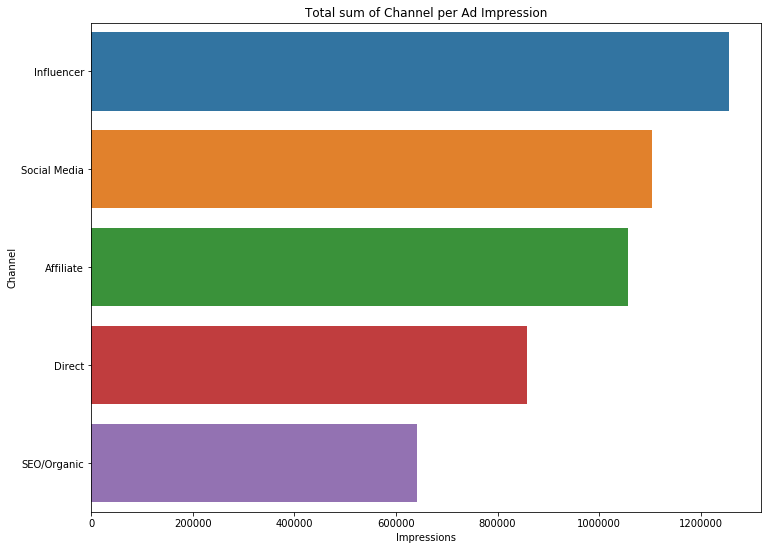

In [55]:
sns.barplot(channel_impressions['ad_impressions'], channel_impressions.index )
plt.xlabel('Impressions')
plt.ylabel('Channel')
plt.title('Total Sum of Channel per Ad Impression')

In [56]:
channel_clicks = channel_sums.sort_values(by = 'ad_clicks', ascending =False)

Text(0.5,1,'Total Sum of Channel per Ad Click')

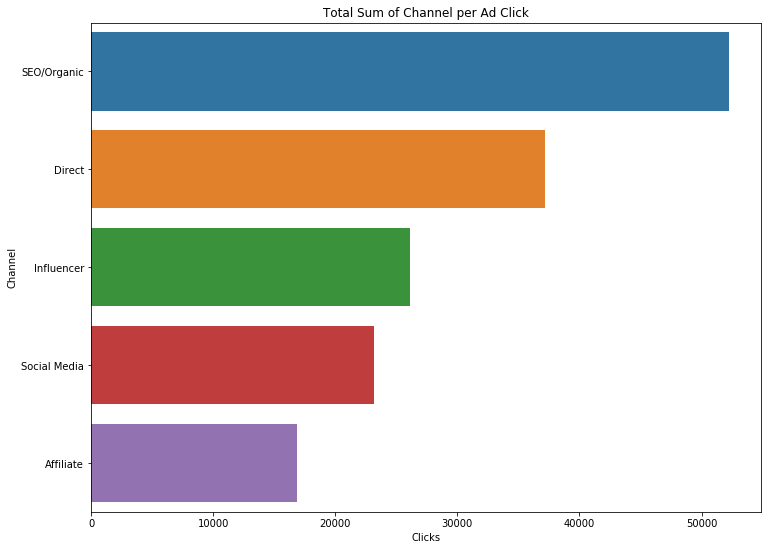

In [57]:
sns.barplot(channel_clicks['ad_clicks'], channel_clicks.index )
plt.xlabel('Clicks')
plt.ylabel('Channel')
plt.title('Total Sum of Channel per Ad Click')

In [58]:
channel_conversion = channel_sums.sort_values(by = 'ad_conversions', ascending =False)

Text(0.5,1,'Total Sum of Channel per Ad Conversion')

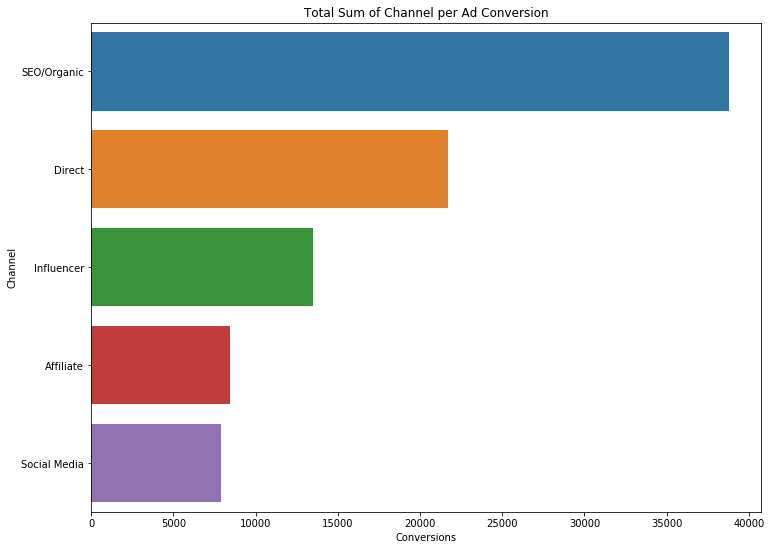

In [59]:
sns.barplot(channel_conversion['ad_conversions'], channel_conversion.index )
plt.xlabel('Conversions')
plt.ylabel('Channel')
plt.title('Total Sum of Channel per Ad Conversion')

In [60]:
channel_spend = channel_sums.sort_values(by = 'total_ad_spend', ascending =False)

Text(0.5,1,'Total Sum of Channel per Ad Spend')

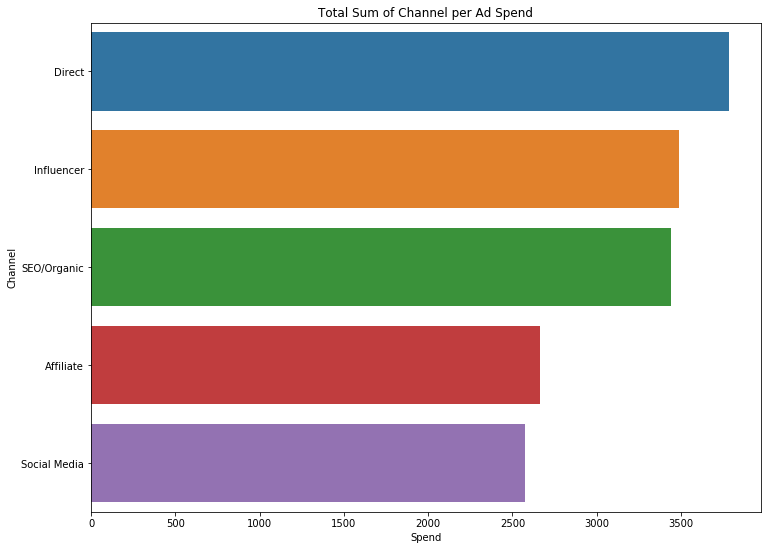

In [62]:
sns.barplot(channel_spend['total_ad_spend'], channel_spend.index )
plt.xlabel('Spend')
plt.ylabel('Channel')
plt.title('Total Sum of Channel per Ad Spend')

### SEO/Organic Advertiser Exploration
Considering how SEO/Organic has such a high click to conversion rate, the section below is investigating each advertiser in the SEO/Organic channel category.

In [64]:
# filtering for only SEO/Organic channel
seo = df[df['channel_name'] == 'SEO/Organic']

In [65]:
seo_name_count = seo.groupby(['advertiser_name']).count().sort_values(by = 'total_ad_spend', ascending =False)

In [66]:
seo_name_impressions = seo.groupby(['advertiser_name']).sum().sort_values(by = 'ad_impressions', ascending =False)

Text(0.5,1,'Total Sum of Advertiser in SEO/Organic Channel per Ad Impression')

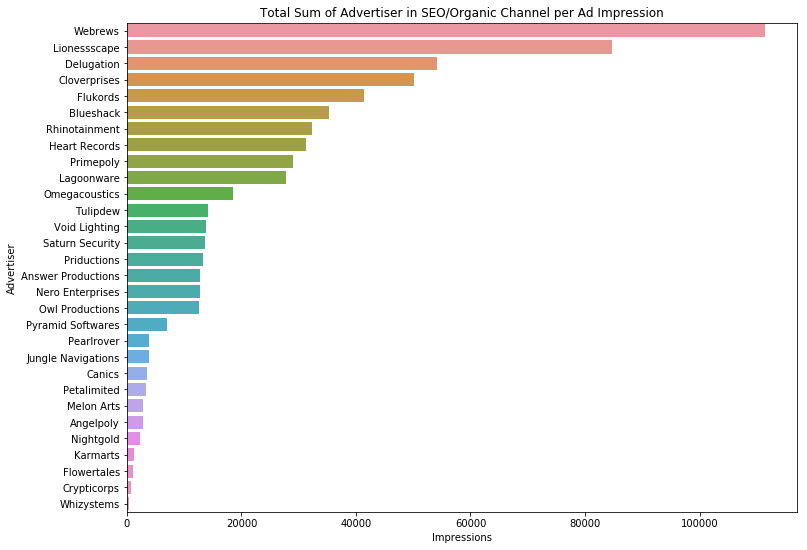

In [68]:
sns.barplot(seo_name_impressions['ad_impressions'],seo_name_impressions.index)
plt.xlabel('Impressions')
plt.ylabel('Advertiser')
plt.title('Total Sum of Advertiser in SEO/Organic Channel per Ad Impression')

In [69]:
seo_name_clicks = seo.groupby(['advertiser_name']).sum().sort_values(by = 'ad_clicks', ascending =False)

Text(0.5,1,'Total Sum of Advertiser in SEO/Organic Channel per Ad Clicks')

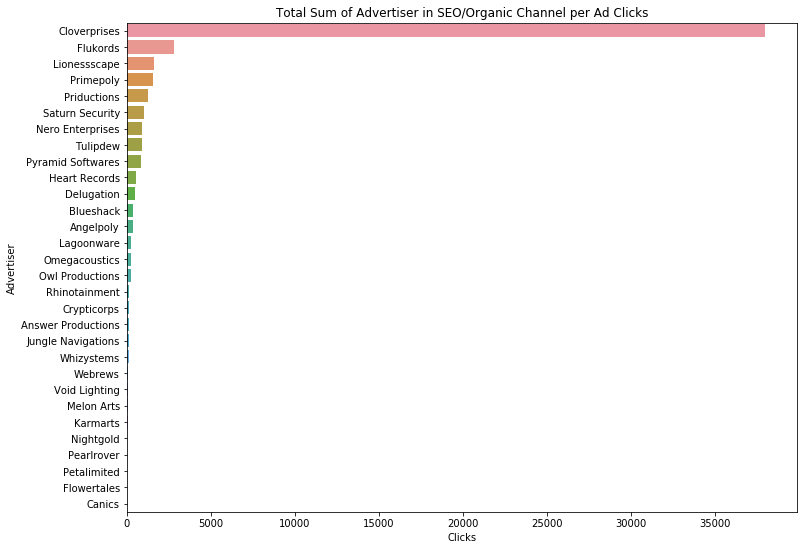

In [70]:
sns.barplot(seo_name_clicks['ad_clicks'],seo_name_clicks.index)
plt.xlabel('Clicks')
plt.ylabel('Advertiser')
plt.title('Total Sum of Advertiser in SEO/Organic Channel per Ad Clicks')

In [71]:
seo_name_conversions = seo.groupby(['advertiser_name']).sum().sort_values(by = 'ad_conversions', ascending =False)

Text(0.5,1,'Total Sum of Advertiser in SEO/Organic Channel per Ad Conversion')

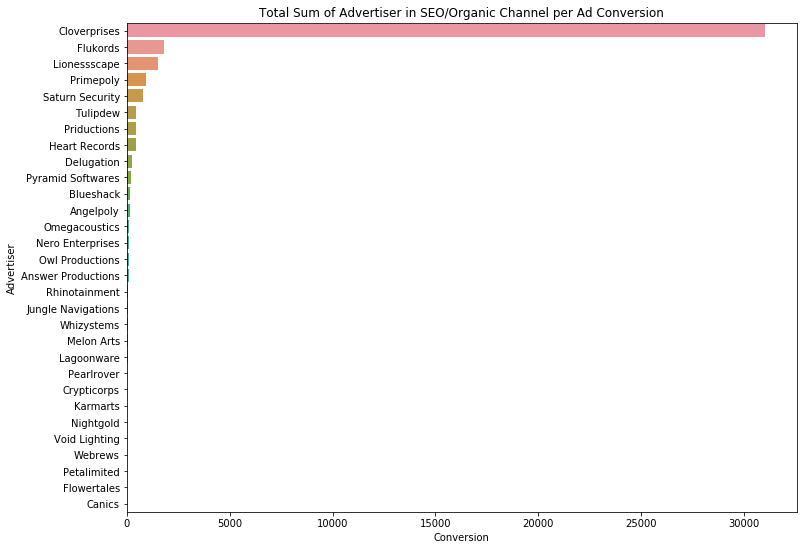

In [72]:
sns.barplot(seo_name_conversions['ad_conversions'],seo_name_conversions.index)
plt.xlabel('Conversion')
plt.ylabel('Advertiser')
plt.title('Total Sum of Advertiser in SEO/Organic Channel per Ad Conversion')

In [73]:
seo_name_spend = seo.groupby(['advertiser_name']).sum().sort_values(by = 'total_ad_spend', ascending =False)

Text(0.5,1,'Total Sum of Advertiser in SEO/Organic Channel per Ad Spend')

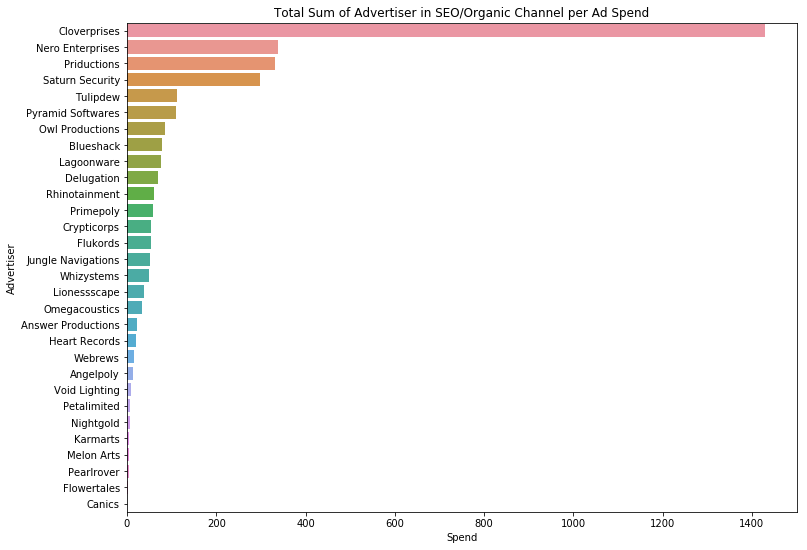

In [75]:
sns.barplot(seo_name_spend['total_ad_spend'],seo_name_spend.index)
plt.xlabel('Spend')
plt.ylabel('Advertiser')
plt.title('Total Sum of Advertiser in SEO/Organic Channel per Ad Spend')

In [76]:
# Creating a new column called conversion spend
seo_name_spend['conversion_spend'] = seo_name_spend['ad_conversions']/seo_name_spend['total_ad_spend']

In [77]:
# creating a new column called click spend
seo_name_spend['click_spend'] = seo_name_spend['ad_clicks']/seo_name_spend['total_ad_spend']

In [78]:
conversion_spend = seo_name_spend.sort_values(by='conversion_spend', ascending = False)

Text(0.5,1,'Conversion Spend per Advertiser in SEO/Organic')

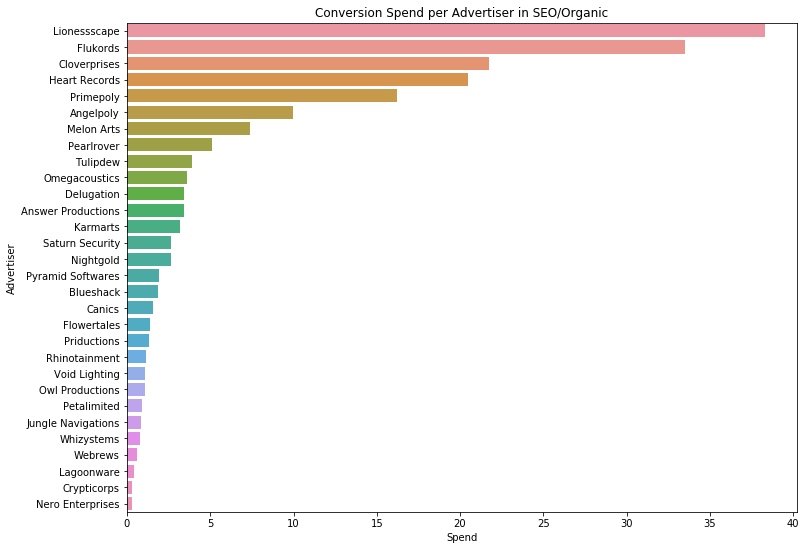

In [80]:
sns.barplot(conversion_spend['conversion_spend'], conversion_spend.index)
plt.xlabel('Spend')
plt.ylabel('Advertiser')
plt.title('Conversion Spend per Advertiser in SEO/Organic')

The graph above is an interesting one. It shows that the advertiser that has the second highest budget in SEO/Organic channel has the worst conversion spend rate.

In [81]:
click_spend = seo_name_spend.sort_values(by='click_spend', ascending = False)

Text(0.5,1,'Click Spend per Advertiser in SEO/Organic Channel')

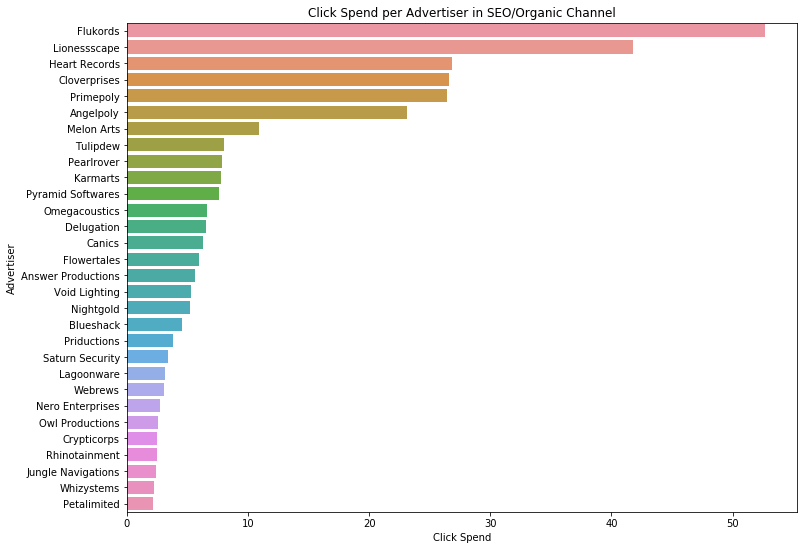

In [83]:
sns.barplot(click_spend['click_spend'], click_spend.index)
plt.xlabel('Click Spend')
plt.ylabel('Advertiser')
plt.title('Click Spend per Advertiser in SEO/Organic Channel')

The graph above allowed me to identify the best advertisers that could produce more clicks than Nero. It looks like Flukord and Lionessscape are ranked 1 and 2 for click spend.

In [85]:
# creating a new column called click to conversion rate
seo_name_spend['click_to_conversion'] = round((seo_name_spend['ad_conversions'] /seo_name_spend['ad_clicks'])*100,2)

In [86]:
click_to_conversion = seo_name_spend.sort_values(by='click_to_conversion',ascending = False)

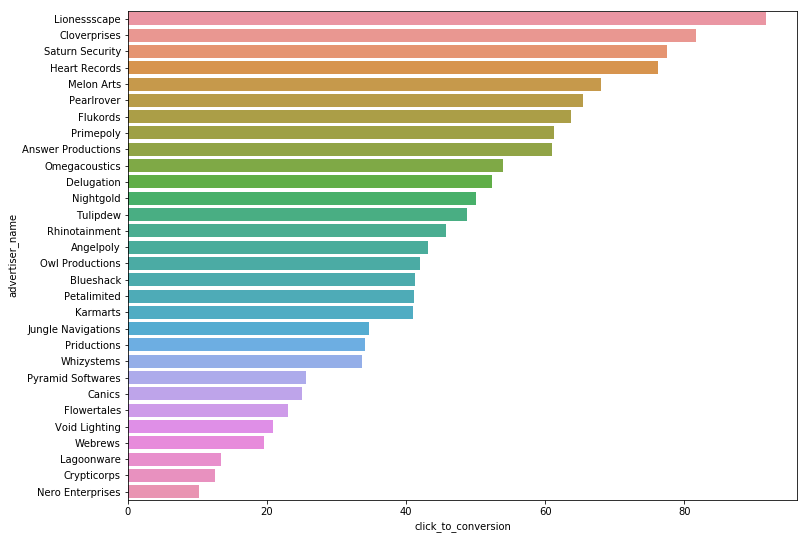

In [87]:
sns.barplot(click_to_conversion['click_to_conversion'],click_to_conversion.index)

The graph above informs us of the advertisers with the highest click to conversion percentage. What's interesting is Lionessscape and Flukord are amongst the highest, while Nero Enterprises has the absolute worst click to conversion rate.

### Exploration
The following graphs below are just part of my exploration.

In [323]:
fiscal_channel = df.groupby(['channel_name', 'advertiser_name']).sum().reset_index()

In [343]:
fiscal_channel['CTR'] = round((fiscal_channel['ad_clicks']/fiscal_channel['ad_impressions'])*100,2)
fiscal_channel['impression_to_conversion'] = round((fiscal_channel['ad_conversions']/fiscal_channel['ad_impressions'])*100,2)
fiscal_channel['conversion_per_spend'] = round((fiscal_channel['ad_conversions']/fiscal_channel['total_ad_spend'])*100,2)

In [344]:
fiscal_channel.sort_values(by='conversion_per_spend', ascending = False)

,channel_name,advertiser_name,fiscal_week,retailer_name_on_ad,brand_name_on_ad,website_ad_rank,ad_impressions,ad_clicks,ad_conversions,total_ad_spend,total_weeks_advertising_with_vice,CPI_percent,conversion_per_spend,CTR,impression_to_conversion
103,SEO/Organic,Lionessscape,60,4,8,51,84728,1640,1504,39.28,225,16.60,3828.92,1.94,1.78
98,SEO/Organic,Flukords,31,1,4,22,41462,2824,1798,53.64,128,30.22,3351.98,6.81,4.34
133,Social Media,Lionessscape,39,2,5,42,12012,1827,1638,63.18,175,30.23,2592.59,15.21,13.64
15,Affiliate,Nero Enterprises,45,3,7,19,5047,845,744,31.14,231,59.13,2389.21,16.74,14.74
94,SEO/Organic,Cloverprises,85,3,6,52,50108,37981,31013,1428.61,150,114.25,2170.85,75.80,61.89
57,Direct,Void Lighting,80,3,8,58,22680,872,591,27.76,350,26.55,2128.96,3.84,2.61
99,SEO/Organic,Heart Records,43,2,5,33,31192,560,427,20.86,42,65.41,2046.98,1.80,1.37
33,Direct,Canics,73,1,5,49,42707,3326,2870,152.60,440,41.08,1880.73,7.79,6.72
112,SEO/Organic,Primepoly,86,3,8,80,28931,1536,942,58.06,200,19.77,1622.46,5.31,3.26
74,Influencer,Melon Arts,73,2,6,55,3663,1943,1655,110.91,126,165.71,1492.20,53.04,45.18


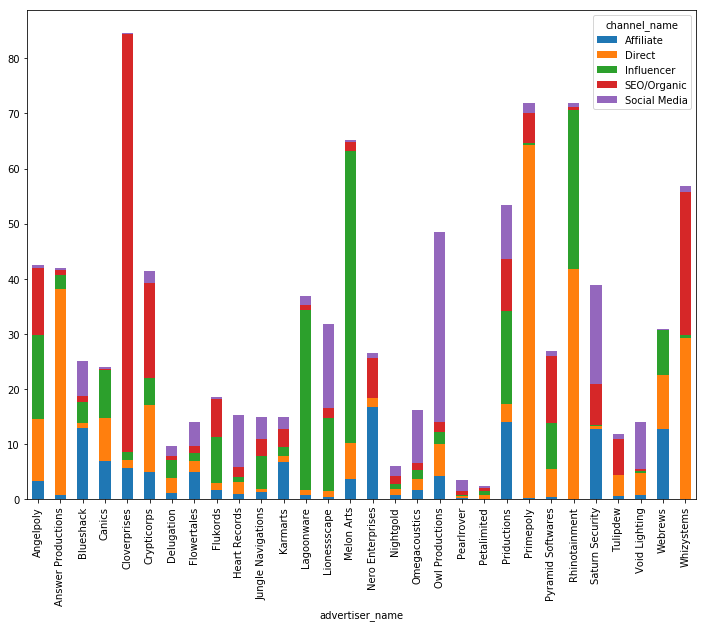

In [346]:
pivot_df = fiscal_channel.pivot(index='advertiser_name', columns='channel_name', values='CTR')
#Note: .loc[:,['Jan','Feb', 'Mar']] is used here to rearrange the layer ordering
pivot_df.plot.bar(stacked=True)

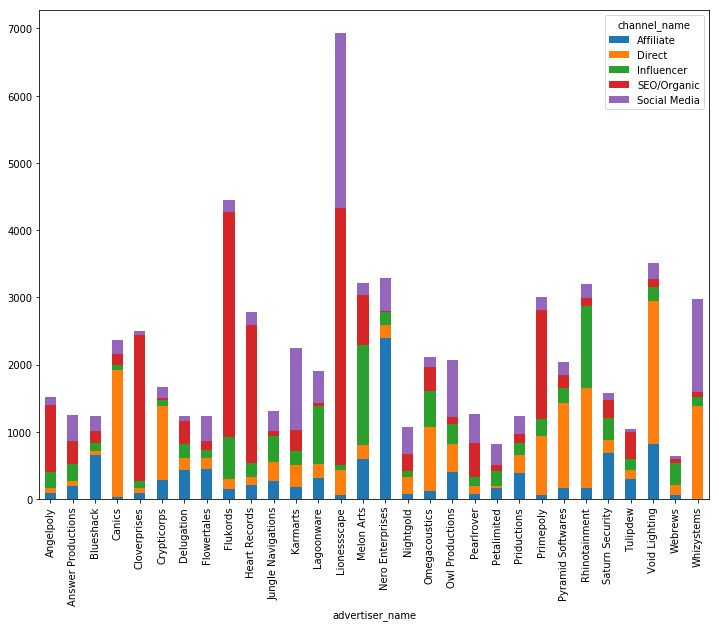

In [345]:
pivot_df = fiscal_channel.pivot(index='advertiser_name', columns='channel_name', values='conversion_per_spend')
#Note: .loc[:,['Jan','Feb', 'Mar']] is used here to rearrange the layer ordering
pivot_df.plot.bar(stacked=True)

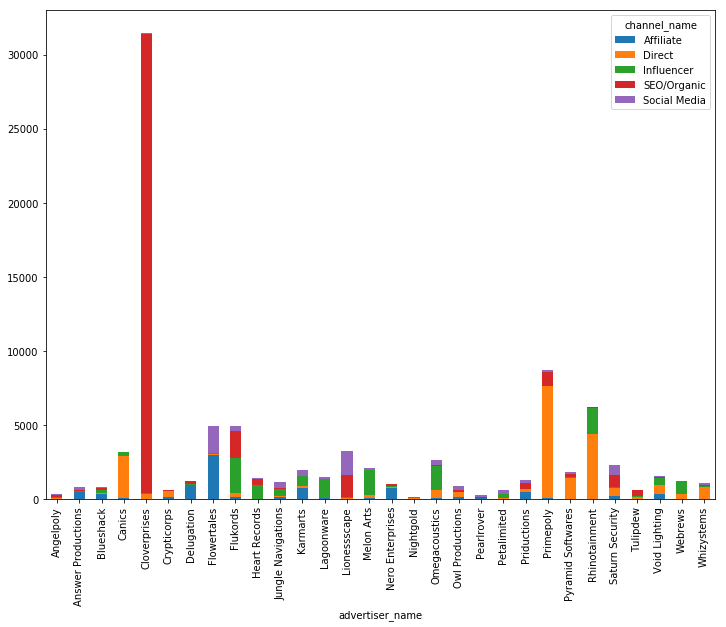

In [333]:
pivot_df = fiscal_channel.pivot(index='advertiser_name', columns='channel_name', values='ad_conversions')
#Note: .loc[:,['Jan','Feb', 'Mar']] is used here to rearrange the layer ordering
pivot_df.plot.bar(stacked=True)

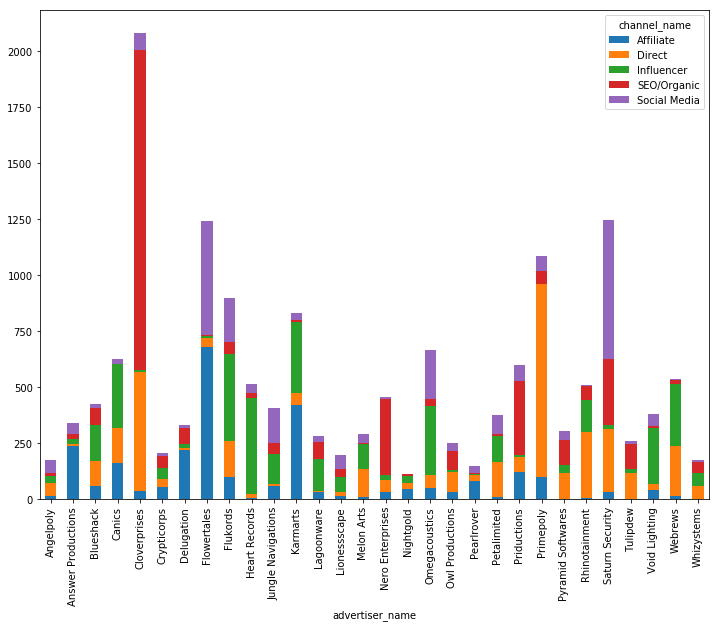

In [334]:
pivot_df = fiscal_channel.pivot(index='advertiser_name', columns='channel_name', values='total_ad_spend')
#Note: .loc[:,['Jan','Feb', 'Mar']] is used here to rearrange the layer ordering
pivot_df.plot.bar(stacked=True)

In [19]:
dfWeek = df.sort_values(by = 'fiscal_week')

In [25]:
dfWeek = dfWeek.groupby(['fiscal_week','advertiser_name']).mean().reset_index()

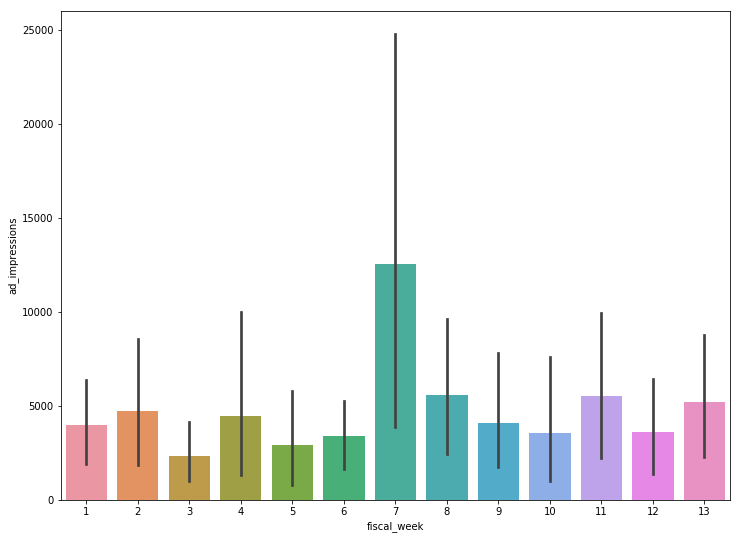

In [47]:
sns.barplot(x=dfWeek["fiscal_week"], y=dfWeek["ad_impressions"])

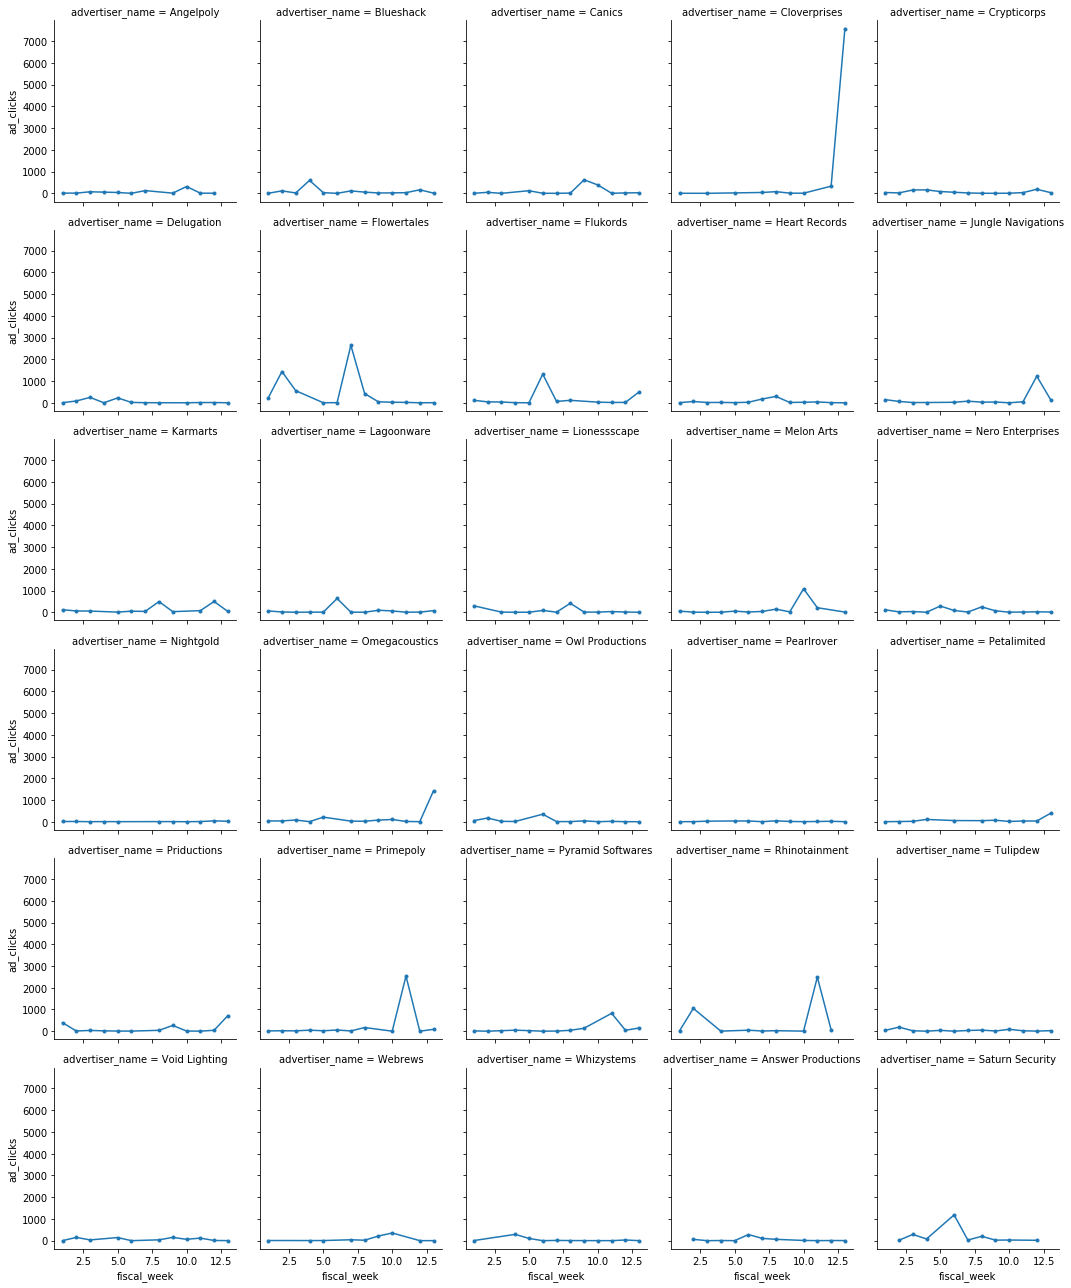

In [50]:
g = sns.FacetGrid(dfWeek, col="advertiser_name", col_wrap=5)
g = g.map(plt.plot, "fiscal_week", "ad_clicks", marker=".")